In [8]:
#Naive Bayes
import numpy as np # Library for linear algebra and math utils
import pandas as pd # Dataframe library

import matplotlib.pyplot as plt # Library for plots


In [13]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


In [ ]:
 ## Calculate the likelihoods for each tweet

In [10]:
data = pd.read_csv('bayes_features.csv'); # Load the data from the csv file

data.head(5) # Print the first 5 tweets features. Each row represents a tweet

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


In [ ]:
#The parameter n_std stands for the number of standard deviations bounded by the ellipse. 
#Remember that for normal random distributions:

#About 68% of the area under the curve falls within 1 standard deviation around the mean.
#About 95% of the area under the curve falls within 2 standard deviations around the mean.
#About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

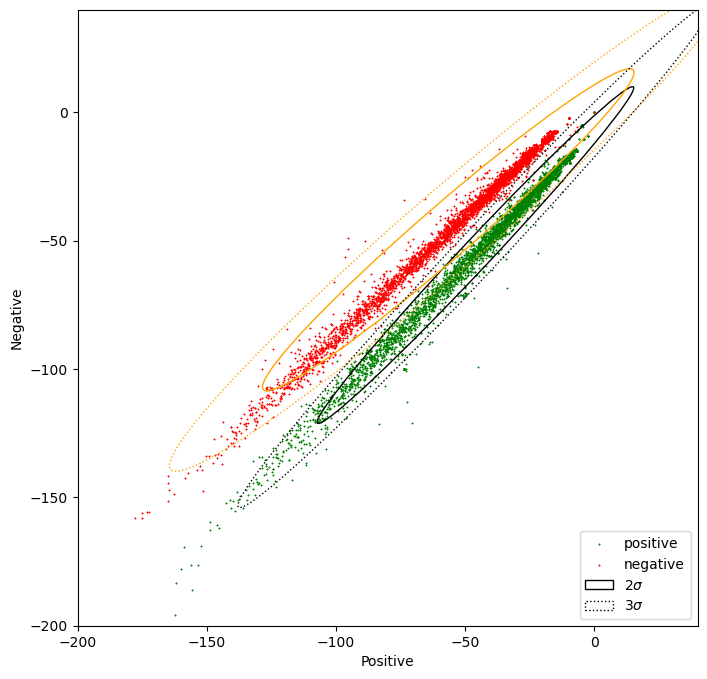

In [14]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete
sentiments = ['negative', 'positive'] 
index = data.index

# Color base on sentiment
for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data[data.sentiment == 1] # Filter only the positive samples
data_neg = data[data.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend(loc='lower right')

plt.show()

In [ ]:
#By altering the negative and positive attributes specifically for rows where sentiment equals 1, 
#you're intentionally changing the distribution of these features. The adjustments (multiplying negative by 1.5 and adding 50, dividing positive by 1.5 and subtracting 50) 
#are likely designed to bring these features closer to those of samples with negative sentiment (sentiment == 0).

In [ ]:
#Overlap: This means that the features for positive and negative sentiments will have overlapping values more than they did before.
#Overlapping feature distributions 
#can make it harder for classification models to distinguish between the two classes based on these features alone.

In [15]:
#l modify the features of the samples with positive sentiment (1)
data2 = data.copy() # Copy the whole data frame

# The following 2 lines only modify the entries in the data frame where sentiment == 1
data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50 # Modify the negative attribute
data2.positive[data.sentiment == 1] =  data2.positive / 1.5 - 50 # Modify the positive attribute 

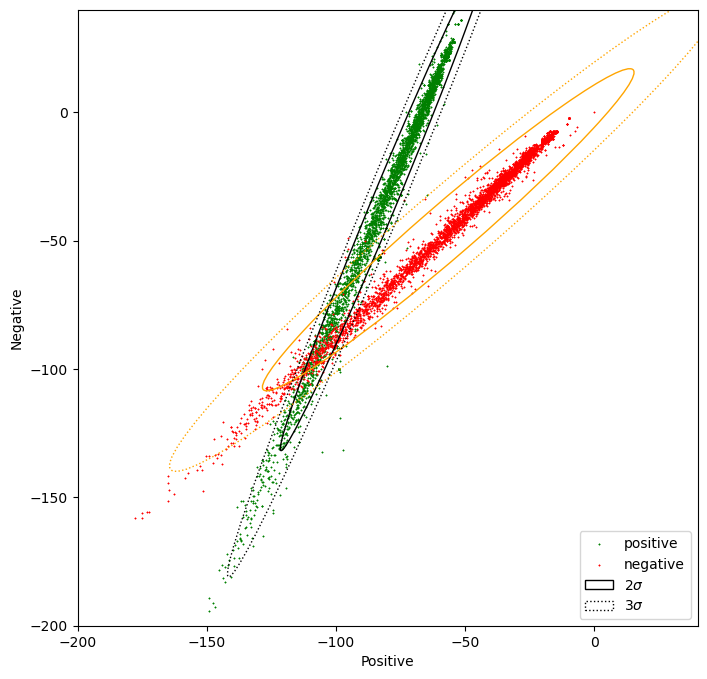

In [18]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete
sentiments = ['negative', 'positive'] 
index = data2.index

# Color base on sentiment
for sentiment in data2.sentiment.unique():
    ix = index[data2.sentiment == sentiment]
    ax.scatter(data2.iloc[ix].positive, data2.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

#ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet
# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data2[data2.sentiment == 1] # Filter only the positive samples
data_neg = data[data2.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend(loc='lower right')

plt.show()